# Orbit Integration

# TODO explain what orbit integration is

In most stellar systems, orbits cannot be computed analytically, so effective algorithms for numerical orbit integration are among the most important tools for stellar dynamics.

The best integrator to use for a given problem is determined by several factors:
    
* How smooth is the potential? The exploration of orbits in an analytic model of a galaxy potential places fewer demands on the integrator than following orbits in an open cluster, where the stars are buffeted by close encounters with their neighbors.
* How cheaply can we evaluate the gravitational field? 
* How much memory is available? The most accurate integrators use the position and velocity of a particle at several previous timesteps to help predict its future position. When simulating a star cluster, plenty of memory should be available to store this information. In a simulation of galaxy dynamics or a cosmological simulation, however, it is important to use as many particles as possible, so memory is an important constraint. Thus for such simulations the optimal integrator predicts the future phase-space position using only the current position and gravitational field.
* How long will the integration run? 

If you want to take a glimpse at the orbit integration methods, [this is a good place to start](http://www.dem.inpe.br/~hkk/Cursos/Sat_art-HKK.pdf). You will see in the code that we used the `RungeKutta`.

There is also a [nice chapter about it here](https://pantheon.ufrj.br/bitstream/11422/4587/1/864699.pdf)

## Let's start

Now, let's dive into the code. 

First of all, we have to tell the Jupiter Notebook to render our graphs. In order to do that, we use one of what is known as magic functions

From the docs:

`%matplotlib inline` sets the backend of matplotlib to the 'inline' backend.

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

So, here we go:

In [2]:
%matplotlib inline

It is time to import some libraries:

In [1]:
from galpy import potential
from galpy.orbit import Orbit
from galpy.potential import plotRotcurve
from astropy import units
import matplotlib.pyplot as plot
import numpy


## The potencial

We are using the [Logarithm potential](https://galpy.readthedocs.io/en/v1.4.0/reference/potentialloghalo.html)

# TODO: explain why

In [5]:
# # Nomeando os potenciais utilizados
# mp= MiyamotoNagaiPotential(a=0.5,b=0.0375,normalize=.6)
# np= NFWPotential(a=4.5,normalize=.35)
# hp= HernquistPotential(a=0.6/8,normalize=0.05)

lhp = potential.LogarithmicHaloPotential()


There are other potentials we can use:

* [MiyamotoNagaiPotential](https://galpy.readthedocs.io/en/v1.4.0/reference/potentialmiyamoto.html)
* [NFWPotential](https://galpy.readthedocs.io/en/v1.4.0/reference/potentialnfw.html)
* [HernquistPotential](https://galpy.readthedocs.io/en/v1.4.0/reference/potentialhernquist.html)

There are so many others. Study them to find out which one works best for you.

# TODO explain code bellow in details

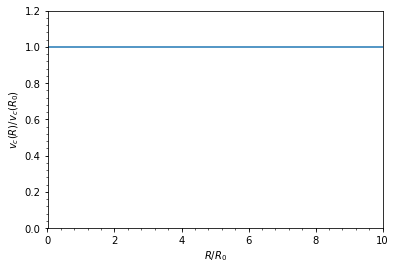

In [17]:
# Faz o gráfico da curva de rotação dos 3 potenciais combinados
plotRotcurve([lhp],Rrange=[0.01,10.],grid=1001,yrange=[0.,1.2])

# Utilizamos o tempo de integração como 1 Gyr em 1000 passos
ts = numpy.linspace(0.,10.0,1000)*units.Gyr

#   órbita        R     vR    vT    z    vz   phi
op = Orbit(vxvv=[0.875, 0.04 , 1.1 , 0. , 0.0 , 0. ],ro=8.,vo=230.) 


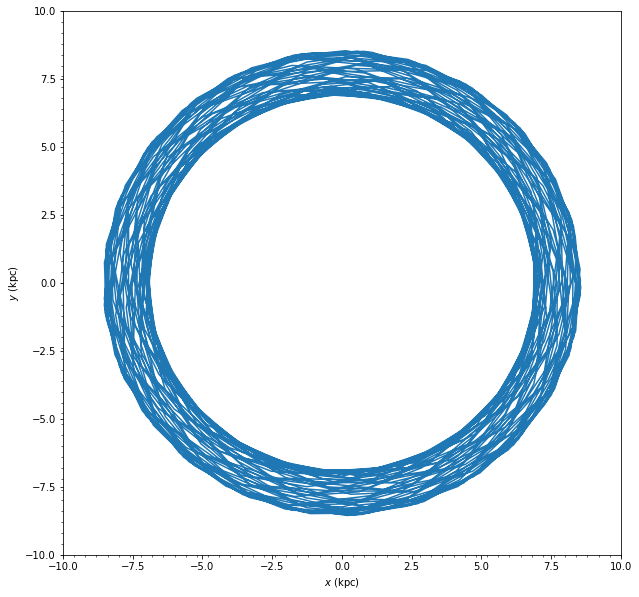

In [23]:
# Integramos em ts, nos potenciais combinados, pelo método Runge Kutta 6
op.integrate(ts,lhp, method='rk6_c')

# Faz-se o gráfico da órbita
op.plot(d1='x',d2='y') 

# plot.figure (2)

plot.xlim( -10, 10 )
plot.ylim( -10, 10 )
fig = plot.gcf()
fig.set_size_inches(10., 10.)


In [24]:
op.animate(d1='x',d2='y',width=600,height=600)